<a href="https://colab.research.google.com/github/sunujoseph/CSCI4050ML/blob/master/Copy_of_Copy_of_CSCI_4050U_Assignment_2_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as pl
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Reshape, Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

np.set_printoptions(suppress=True, precision=2)

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train / 255.
x_test = x_test / 255.

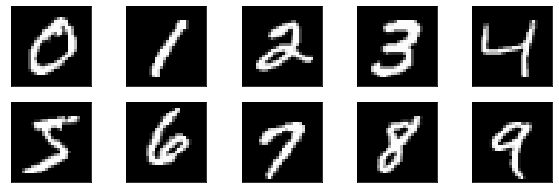

In [ ]:
pl.figure(figsize=(10, 5))
for i in range(10):
  pl.subplot(3, 5, i+1)
  k = np.where(y_train == i)[0][0]
  pl.imshow(x_train[k], cmap='gray')
  pl.xticks([])
  pl.yticks([])

# Multilayer Perceptron

In [ ]:
model1 = Sequential([
  Input(shape=(28, 28)),
  Reshape((28*28,)),
  Dense(10),
  Dense(10),
  Dense(10),
  Dense(10, activation='softmax')
])

In [ ]:
model1.compile(loss=sparse_categorical_crossentropy, optimizer=Adam(0.001), metrics=['acc'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,180
Trainable params: 8,180
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model1.fit(x_train, y_train, epochs=10, validation_split=0.1).history

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 9s 159us/sample - loss: 0.5353 - acc: 0.8430 - val_loss: 0.3360 - val_acc: 0.9060
Epoch 2/10
54000/54000 [==============================] - 6s 118us/sample - loss: 0.3629 - acc: 0.8973 - val_loss: 0.2748 - val_acc: 0.9218
Epoch 3/10
54000/54000 [==============================] - 6s 114us/sample - loss: 0.3181 - acc: 0.9102 - val_loss: 0.2559 - val_acc: 0.9263
Epoch 4/10
54000/54000 [==============================] - 6s 112us/sample - loss: 0.3055 - acc: 0.9151 - val_loss: 0.2490 - val_acc: 0.9307
Epoch 5/10
54000/54000 [==============================] - 6s 113us/sample - loss: 0.2974 - acc: 0.9174 - val_loss: 0.2486 - val_acc: 0.9265
Epoch 6/10
54000/54000 [==============================] - 6s 114us/sample - loss: 0.2898 - acc: 0.9191 - val_loss: 0.2429 - val_acc: 0.9325
Epoch 7/10
54000/54000 [==============================] - 6s 113us/sample - loss: 0.2830 - acc: 0.9205 - val_lo

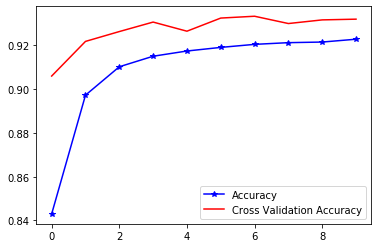

In [ ]:
pl.plot(history1['acc'], '-*', color='blue');
pl.plot(history1['val_acc'], '-', color='red');
pl.legend(['Accuracy', 'Cross Validation Accuracy']);

In [ ]:
model1.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 78us/sample - loss: 0.2889 - acc: 0.9177


[0.2888865422576666, 0.9177]

# MLP with non-linear activation

In [ ]:
model2 = Sequential([
  Input(shape=(28, 28)),
  Reshape((28*28,)),
  Dense(10, activation='relu'),
  Dense(10, activation='relu'),
  Dense(10, activation='relu'),
  Dense(10, activation='softmax')
])
model2.compile(loss=sparse_categorical_crossentropy,
               optimizer=Adam(0.001),
               metrics=['acc'])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
Total params: 8,180
Trainable params: 8,180
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(x_train, y_train, epochs=10, validation_split=0.1).history

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 7s 124us/sample - loss: 0.6682 - acc: 0.7859 - val_loss: 0.3128 - val_acc: 0.9078
Epoch 2/10
54000/54000 [==============================] - 6s 116us/sample - loss: 0.3367 - acc: 0.9010 - val_loss: 0.2584 - val_acc: 0.9232
Epoch 3/10
54000/54000 [==============================] - 6s 114us/sample - loss: 0.2855 - acc: 0.9161 - val_loss: 0.2250 - val_acc: 0.9350
Epoch 4/10
54000/54000 [==============================] - 6s 115us/sample - loss: 0.2547 - acc: 0.9272 - val_loss: 0.2101 - val_acc: 0.9395
Epoch 5/10
54000/54000 [==============================] - 6s 115us/sample - loss: 0.2392 - acc: 0.9311 - val_loss: 0.1971 - val_acc: 0.9445
Epoch 6/10
54000/54000 [==============================] - 6s 116us/sample - loss: 0.2271 - acc: 0.9337 - val_loss: 0.1876 - val_acc: 0.9473
Epoch 7/10
54000/54000 [==============================] - 6s 115us/sample - loss: 0.2176 - acc: 0.9370 - val_lo

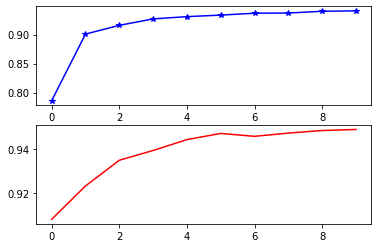

In [ ]:
pl.subplot(2,1,1)
pl.plot(history2['acc'], '-*', color='blue');
pl.subplot(2,1,2)
pl.plot(history2['val_acc'], '-', color='red');
# pl.legend(['Accuracy', 'Cross Validation Accuracy']);

In [ ]:
model2.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 87us/sample - loss: 0.2067 - acc: 0.9406


[0.20672717925161124, 0.9406]

# Convolutional Networks

In [ ]:
model3 = Sequential([
  Input((28, 28)),
  Reshape((28, 28, 1)),
  Conv2D(32, (3,3)),
  MaxPool2D((2,2)),
  Reshape((13*13*32,)),
  Dense(10, activation='softmax')
])
model3.compile(loss=sparse_categorical_crossentropy,
               optimizer=Adam(0.001),
               metrics=['acc'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 5408)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history3 = model3.fit(x_train, y_train, epochs=10, validation_split=0.1).history

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 11s 207us/sample - loss: 0.2793 - acc: 0.9208 - val_loss: 0.1216 - val_acc: 0.9675
Epoch 2/10
54000/54000 [==============================] - 6s 116us/sample - loss: 0.1227 - acc: 0.9656 - val_loss: 0.0843 - val_acc: 0.9783
Epoch 3/10
54000/54000 [==============================] - 6s 116us/sample - loss: 0.0907 - acc: 0.9732 - val_loss: 0.0842 - val_acc: 0.9755
Epoch 4/10
54000/54000 [==============================] - 6s 117us/sample - loss: 0.0747 - acc: 0.9772 - val_loss: 0.0691 - val_acc: 0.9813
Epoch 5/10
54000/54000 [==============================] - 6s 117us/sample - loss: 0.0620 - acc: 0.9814 - val_loss: 0.0787 - val_acc: 0.9777
Epoch 6/10
54000/54000 [==============================] - 7s 121us/sample - loss: 0.0556 - acc: 0.9830 - val_loss: 0.0690 - val_acc: 0.9810
Epoch 7/10
54000/54000 [==============================] - 7s 121us/sample - loss: 0.0481 - acc: 0.9850 - val_l

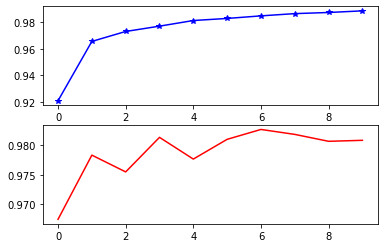

In [ ]:
pl.subplot(2,1,1)
pl.plot(history3['acc'], '-*', color='blue');
pl.subplot(2,1,2)
pl.plot(history3['val_acc'], '-', color='red');
# pl.legend(['Accuracy', 'Cross Validation Accuracy']);

In [ ]:
model3.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 82us/sample - loss: 0.0841 - acc: 0.9746


[0.08406690261415206, 0.9746]

# Comparative study

In [ ]:
z1 = np.argmax(model1.predict(x_test), axis=1)
z2 = np.argmax(model2.predict(x_test), axis=1)
z3 = np.argmax(model3.predict(x_test), axis=1)

In [ ]:
np.sum(np.logical_and(z1 == y_test, z2 != y_test)) / len(z1)

0.0182

In [ ]:
def accuracy_by_digits(model):
  z = np.argmax(model.predict(x_test), axis=1)
  for i in range(10):
    correct = np.sum(np.logical_and(z == y_test, y_test == i))
    total = np.sum(y_test == i)
    print("[%d]: %.4f" % (i, correct/total))

In [ ]:
def confusion_matrix(model):
  z = np.argmax(model.predict(x_test), axis=1)
  confusion = np.zeros((10, 10))
  for i in range(10):
    for j in range(10):
      if i == j:
        ij = 0
      else:
        ij = np.sum(np.logical_and(y_test == i, z == j))
      confusion[i][j] = ij
  return confusion.astype('int')

In [ ]:
def plot_bad(model, digit):
  z = np.argmax(model.predict(x_test), axis=1)
  I = np.logical_and(y_test == digit, z != digit)
  for i in range(9):
    pl.subplot(3,3,i+1)
    pl.imshow(x_test[I][i])

In [ ]:
def worst_digit(confusion):
  err = np.sum(confusion, axis=1)
  i = np.argmax(err)
  return i, err[i]

In [ ]:
confusion1 = confusion_matrix(model1)
confusion1

array([[ 0,  0,  1,  1,  1,  7,  6,  6,  1,  1],
       [ 0,  0,  5,  2,  0,  3,  1,  2,  7,  0],
       [ 9, 14,  0, 17,  4,  3, 11, 12, 27,  8],
       [ 3,  2, 24,  0,  3, 22,  0,  9, 12, 11],
       [ 2,  7,  6,  1,  0,  0, 16,  6, 10, 69],
       [13,  2,  6, 34,  4,  0,  7, 13, 30, 11],
       [13,  4, 17,  0,  6, 18,  0,  1,  2,  0],
       [ 1,  9, 20,  8,  3,  1,  0,  0,  0, 51],
       [ 7, 14, 10, 32,  8, 27,  6, 10,  0, 19],
       [ 9,  8,  0, 11,  9,  5,  0, 19,  3,  0]])

In [ ]:
worst_digit(confusion1)

(8, 133)

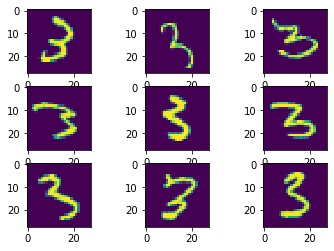

In [ ]:
plot_bad(model1, digit=3)

In [ ]:
confusion2 = confusion_matrix(model2)
confusion2

array([[ 0,  0,  0,  2,  1, 10,  3,  4,  2,  1],
       [ 0,  0,  4,  1,  0,  1,  3,  1,  5,  0],
       [ 7,  5,  0,  6,  9,  1,  3, 14,  7,  1],
       [ 3,  3, 30,  0,  1, 18,  1, 17, 22,  3],
       [ 1,  1,  4,  0,  0,  2,  8,  3,  5, 26],
       [11,  4,  0, 10,  4,  0, 11,  2, 12,  6],
       [14,  3,  7,  0, 10, 20,  0,  1,  5,  0],
       [ 1,  8, 18,  3,  6,  1,  0,  0,  2, 12],
       [12,  8,  7, 12,  9, 19, 10, 10,  0, 13],
       [10,  4,  1,  9, 31,  9,  0, 12,  8,  0]])

In [ ]:
worst_digit(confusion2)

(8, 100)

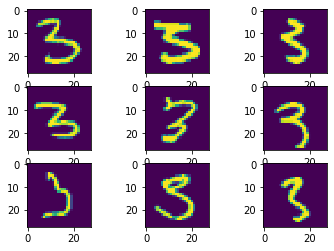

In [ ]:
plot_bad(model2, digit=3)

In [ ]:
confusion3 = confusion_matrix(model3)
confusion3

array([[ 0,  0,  1,  0,  1,  1,  7,  2,  3,  0],
       [ 0,  0,  1,  1,  2,  1,  2,  1,  0,  0],
       [ 4,  1,  0,  1, 11,  0,  3,  5,  8,  1],
       [ 1,  0,  3,  0,  0,  2,  3,  4,  8,  1],
       [ 1,  0,  1,  0,  0,  0,  3,  0,  0,  5],
       [ 3,  0,  1, 10,  1,  0, 18,  1,  6,  2],
       [ 7,  2,  2,  0,  3,  2,  0,  0,  0,  0],
       [ 0,  6,  9,  1,  8,  0,  0,  0,  1, 10],
       [ 7,  0,  3,  1,  5,  1,  6,  3,  0,  2],
       [ 6,  0,  0,  3, 15,  5,  0,  6,  9,  0]])

In [ ]:
worst_digit(confusion3)

(9, 44)

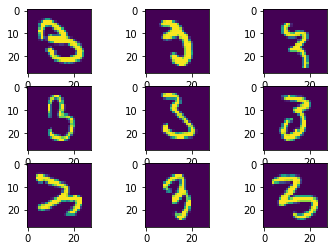

In [ ]:
plot_bad(model3, digit=3)

In [ ]:
model4 = Sequential([
  Input((None, None, 2)),
  Conv2D(3, (2,2)),
  Dense(10)
])
model4.compile(loss=sparse_categorical_crossentropy,
               optimizer=Adam(0.001),
               metrics=['acc'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, None, None, 3)     27        
_________________________________________________________________
dense_9 (Dense)              (None, None, None, 10)    40        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
